# 主题模型效果分析、评估、可视化

In [211]:
###word-topic的关联文件（词-词id-词频-主题libsvm格式向量）
word_topic_map_file="/data2/zemin/rsync_data/lda_vis/word_Id_tf_topic.mapping"
topic_dim=1000
word_dim=300000

In [212]:
####import numpy/scipy
import numpy as np
from numpy import linalg
from numpy.linalg import norm
from scipy.spatial.distance import squareform, pdist
import heapq 
import math

In [213]:
##读取文件(topic-word)
word_topic=np.zeros((word_dim,topic_dim))
word_topic_without_tf=np.zeros((word_dim,topic_dim))
word_dict={}
####
f=open(word_topic_map_file)
for line in f:
    line=line.strip()  
    items=line.split(' ')
    #print(items)
    word_id=int(items[0])
    word_char=items[1]
    word_tf=int(items[2])
    word_dict[word_id]=word_char
    #print(word_id,word_char)  
    topic_list=np.zeros(topic_dim)
    topic_list_without_tf=np.zeros(topic_dim)
    for i in range(3,len(items)):
        topic_weight=items[i]
        topic_id=int(topic_weight.split(':')[0])
        weight=int(topic_weight.split(':')[1])
        #print(topic_id,weight)
        topic_list[topic_id]=weight/math.log(word_tf)
        topic_list_without_tf[topic_id]=weight
    word_topic[word_id]=topic_list
    word_topic_without_tf[word_id]=topic_list_without_tf
print("done")

word_topic_matrix=np.matrix(word_topic)
topic_word_matrix=word_topic_matrix.getT()

word_topic_without_tf_matrix=np.matrix(word_topic_without_tf)
topic_word_without_tf_matrix=word_topic_without_tf_matrix.getT()

In [214]:
output_word_count=10
for topic_id in range(10): 
  K=100 ##3输出topic 5s
  one_topic=topic_word_matrix[topic_id,]
  one_topic_array=one_topic.getA1()  ##转化为数组
  ###topK_weight=one_topic_array[np.argpartition(one_topic_array,-K)[-K:]]  ##内部不排序，找出最大的K个
  topK_word=np.argpartition(one_topic_array,-K)[-K:]
  print("==============topic"+str(topic_id)+"============")
  m=0
  for word_id in topK_word:
    word=word_dict.get(word_id)
    if word!=None and len(word)>3 and m<output_word_count: ###单字词和None不输出
        print(word)
        m=m+1

In [215]:
for topic_id in range(10): 
  K=100 ##3输出topic 5s
  one_topic=topic_word_without_tf_matrix[topic_id,]
  one_topic_array=one_topic.getA1()  ##转化为数组
  ###topK_weight=one_topic_array[np.argpartition(one_topic_array,-K)[-K:]]  ##内部不排序，找出最大的K个
  topK_word=np.argpartition(one_topic_array,-K)[-K:]
  print("==============topic"+str(topic_id)+"============")
  m=0
  for word_id in topK_word:
    word=word_dict.get(word_id)
    if word!=None and len(word)>3 and m<10:
        print(word)
        m=m+1

In [216]:
from matplotlib import pylab
from six.moves import range
from six.moves.urllib.request import urlretrieve
from sklearn.manifold import TSNE
import sys
reload(sys)
sys.setdefaultencoding('utf-8')

In [217]:
num_points = 400
tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000, method='exact')
two_d_embeddings = tsne.fit_transform(word_topic_matrix[1:num_points+1, :])

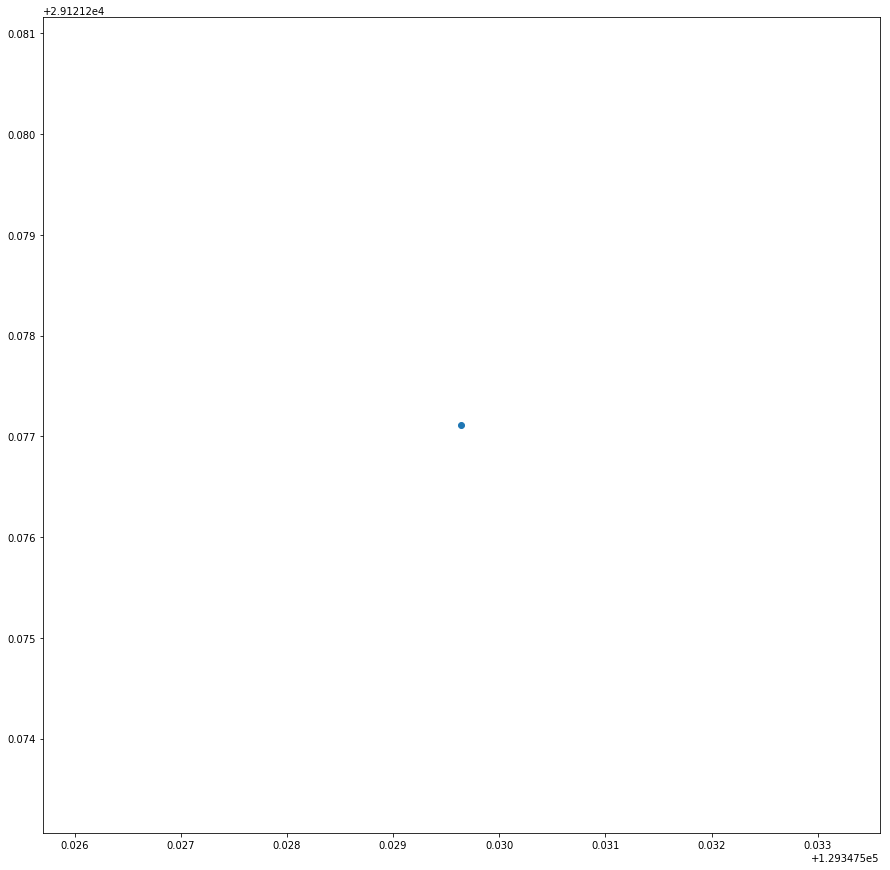

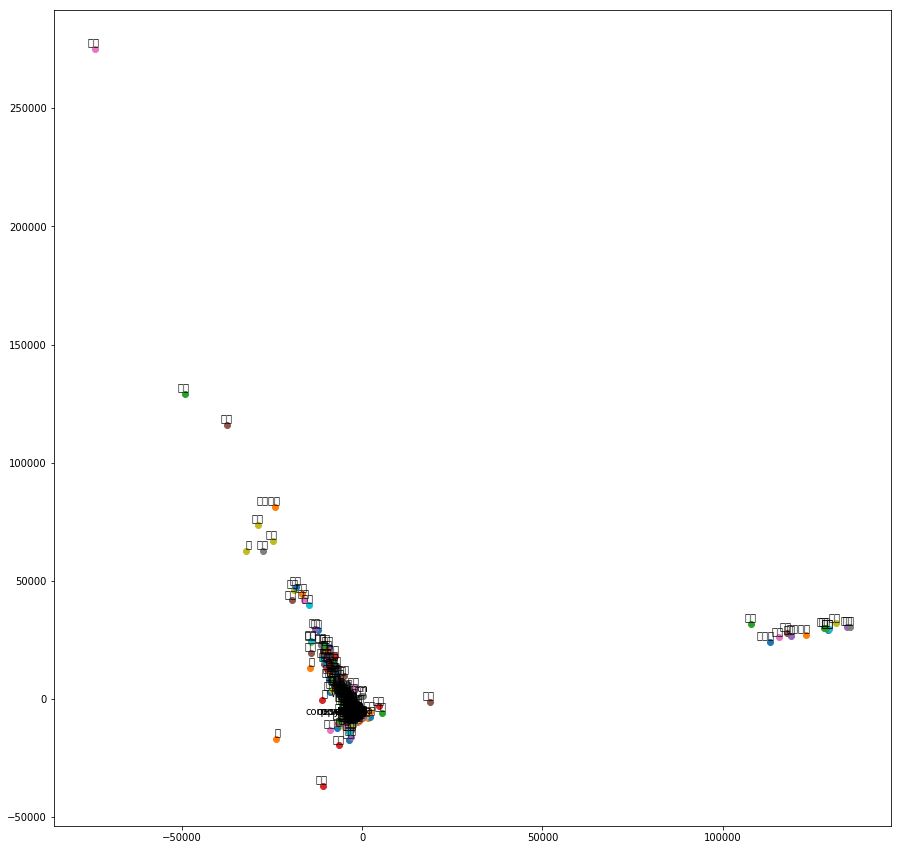

In [210]:
def plot(embeddings, labels):
  assert embeddings.shape[0] >= len(labels), 'More labels than embeddings'
  pylab.figure(figsize=(15,15))  # in inches
  for i, label in enumerate(labels):
    x, y = embeddings[i,:]
    pylab.scatter(x, y)
    pylab.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points',
                   ha='right', va='bottom')
  pylab.show()

words = [word_dict.get(i) for i in range(1, num_points+1)]
#plot(two_d_embeddings, words)